<a href="https://colab.research.google.com/github/Pamela2710/Data-Mining/blob/main/PageRank/PageRank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo Spider Trap 0 =  8 - 7 - 14
Grupo Spider Trap 1 =  11 - 15 - 13
Grupo Spider Trap 2 =  10 - 1 - 3
Dead End 0 =  6
Dead End 1 =  12
Matriz de Transicion
     0     1    2     3     4    5    6    7     8    9    10   11   12   13  \
0   0.0  0.33  0.0  0.00  0.00  0.0  0.0  0.0  0.00  0.5  0.0  0.0  0.0  0.0   
1   0.0  0.33  0.0  0.33  0.25  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
2   1.0  0.00  0.0  0.00  0.00  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
3   0.0  0.00  0.0  0.00  0.00  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
4   0.0  0.33  0.0  0.33  0.25  0.0  0.0  0.0  0.33  0.0  0.0  0.0  0.0  0.0   
5   0.0  0.00  0.0  0.00  0.25  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
6   0.0  0.00  0.0  0.00  0.00  0.0  0.0  0.5  0.00  0.0  0.0  0.0  0.0  0.0   
7   0.0  0.00  0.0  0.00  0.25  0.0  0.0  0.5  0.00  0.0  0.0  0.0  0.0  1.0   
8   0.0  0.00  0.0  0.00  0.00  0.0  0.0  0.0  0.00  0.0  0.0  0.0  0.0  0.0   
9   0.0  0.00  1.0  0.00  0.00  0.0  0.0  

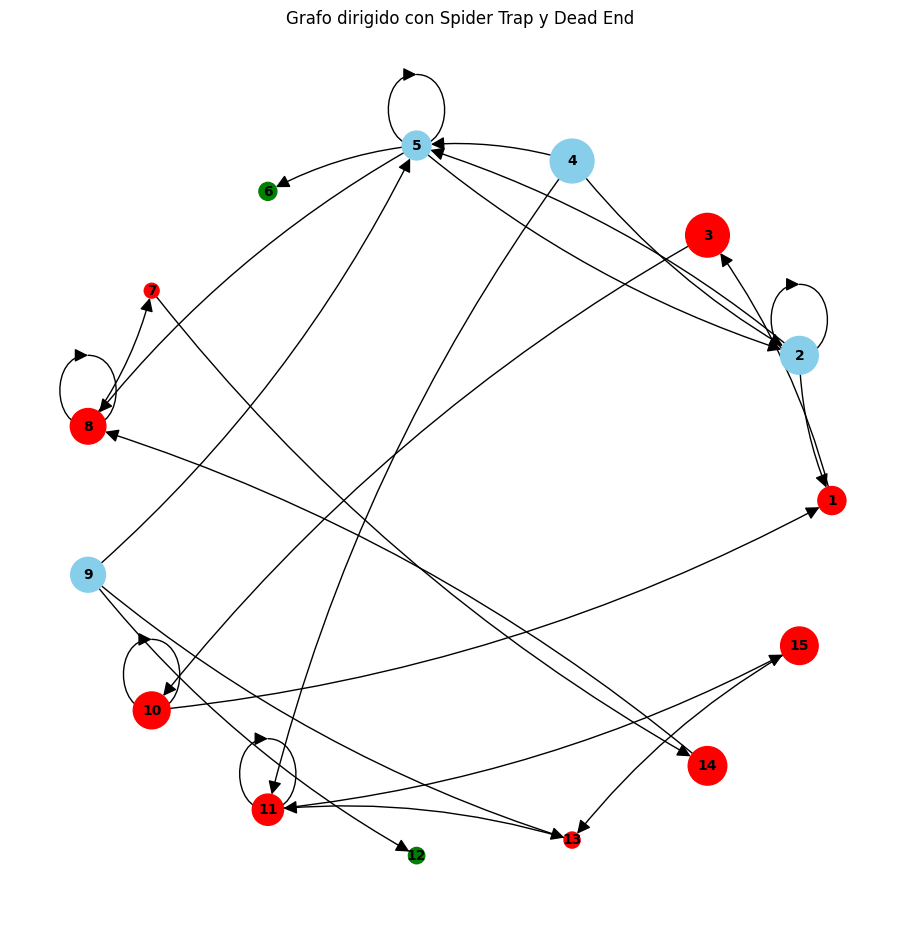

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

nodos_trampa_spider = []
nodos_trampa_dead = []
matriz = []
num_nodes = 15  #nodos

def create_directed_graph(num_nodes):
    G = nx.DiGraph()
    # Agregar nodos con pesos aleatorios
    nodos = list(range(1, num_nodes + 1))
    for node in nodos:
      weight = random.uniform(0.1, 1.0)
      G.add_node(node, weight=weight)
    return G, nodos

def add_spider_trap(G, nodos):

    for i in range(3):
      spider_trap = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead])
      nodos_trampa_spider.append(spider_trap)
      next_node = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead])
      nodos_trampa_spider.append(next_node)
      next_node2 = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead])
      nodos_trampa_spider.append(next_node2)

      G.add_edge(spider_trap, spider_trap)
      G.add_edge(spider_trap, next_node)
      G.add_edge(next_node, next_node2)
      G.add_edge(next_node2, spider_trap)
      print("Grupo Spider Trap", i , "= ", spider_trap ,"-", next_node ,"-", next_node2)

    return G


def add_dead_end(G, nodos):
    nodo_anterior=0
    for i_ in range(2):
      #print("nodoAnt")
      #print(nodo_anterior)
      dead_end = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead and n is not nodo_anterior])
      nodos_trampa_dead.append(dead_end)
      node = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead and n is not nodo_anterior])

      G.add_edge(node, dead_end)
      nodo_anterior=node
      print("Dead End", i_ ,"= ", dead_end)

    return G


def add_random_edges(G, nodos):
    for n in nodos:
        source = random.choice([n for n in nodos if n not in nodos_trampa_spider and n not in nodos_trampa_dead])
        if n not in nodos_trampa_spider and n not in nodos_trampa_dead:
            target = random.choice([n for n in nodos if n != source])
            target2 = random.choice([n for n in nodos if n != source])
            G.add_edge(n, target)
            G.add_edge(n, target2)
            G.add_edge(n, source)
    return G

def draw_graph(G):
    # Crear un diccionario de colores para los nodos
    colors = ['red' if node in nodos_trampa_spider  else 'green' if node in nodos_trampa_dead else 'skyblue' for node in G.nodes]
    weights = [G.nodes[node]['weight'] for node in G.nodes]

    plt.figure(figsize=(9, 9))
    pos = nx.circular_layout(G)
    # Escalar el tamaño de los nodos según el peso
    node_size = [weight * 1000 for weight in weights]

    nx.draw(G, pos, with_labels=True, node_size=node_size, node_color=colors, font_size=10, font_color="black", font_weight="bold", arrowsize=20, connectionstyle="arc3,rad=0.1")
    plt.title("Grafo dirigido con Spider Trap y Dead End")

def matriz_adyacencia(G):
  matrix_adj_ = nx.to_numpy_array(nx.stochastic_graph(G)).transpose()
  matrix_adj = matrix_adj_.round(2)
  matriz_ady = np.array(matrix_adj, dtype=float)
  # Normalizar las filas para que sumen 1
  suma_col = matriz_ady.sum(axis=0, keepdims=True)
  suma_col[suma_col == 0] = 1.0
  matriz_transicion = matriz_ady / suma_col
  # Redondear a 3 decimales
  matriz_transicion_redondeada = np.round(matriz_transicion, 2)
  #print(f'Matriz de Adyacencia:\n{matrix_adj}')

  return matriz_transicion_redondeada

#Funcion Random Walker
def random_walker(matrix):
  remaining_nodes = set(nodos)
  current_node = random.choice([n for n in nodos])
  path = [current_node+1]
  print("Inicio Random Walker en:", current_node+1)
  cont = 0
  teleport = []
  while remaining_nodes :
      cont +=1

      if current_node + 1 in nodos_trampa_dead:
        print("¡Se encuentra en una dead trap!")
        user_input = input("¿Desea teletransportarse? (s/n): ").lower()
        if user_input == "s":
          print("¡Se logro la teletransportacion!")
          current_node = (random.choice([n for n in nodos if n in remaining_nodes ]))-1
          print("Se teletransporto a:", current_node + 1)
          teleport.append(cont)
        else:
          print("¡No teletransporte!")
          print("¡Te quedas en el mismo sitio!")

      else:
        if current_node + 1 in nodos_trampa_spider:
          print("¡Se encuentra en una spider trap!")


        # Obtener la fila correspondiente al nodo actual en la matriz de adyacencia
        transition_probs = matrix.T.loc[current_node].values

        # Normalizar las probabilidades de adyacencia para asegurar que sumen 1
        transition_probs /= transition_probs.sum()

        user_input = input("¿Desea teletransportarse? (s/n): ").lower()
        if user_input == "s":
          print("¡Se logro la teletransportacion!")
          current_node = (random.choice([n for n in nodos if n in remaining_nodes ]))-1
          print("Se teletransporto a:", current_node + 1)
          teleport.append(cont)
        else:
          print("¡No teletransporte!")
          current_node = np.random.choice(matrix.columns, p=transition_probs)


      power_iteration_with_trace(matrix, 0.85, teleport , True, cont)

      # Guardar Recorrido Realizado
      path.append(current_node+1)
      print("Random Walker Path:", path)

      # Marcar el nodo actual como visitado
      if current_node + 1 in remaining_nodes:
        remaining_nodes.remove(current_node + 1)

      # Verificar si todos los nodos han sido visitados
      if not remaining_nodes:
          print("¡Todos los nodos han sido visitados!")
          break

      # Preguntar al usuario si desea continuar
      user_input = input("¿Desea continuar? (s/n): ").lower()

      if user_input != 's':
          break


  return path

#Funcion Power iteration
def power_iteration_with_trace(matriz_adyacencia, d=0.85, teleport_moments=None, verbose = False, iteracion_maxima=1):

  N = matriz_adyacencia.shape[0]
  r = np.ones(N) / N  # Vector inicial uniformemente distribuido
  trace = [r.copy()]  # Almacenar el estado inicial de r

  tolerance = 1e-4 #tolerancia de cambio
  delta = tolerance + 1
  iter = 0

  while delta > tolerance:
    iter += 1
    if iter > iteracion_maxima:
      break


    if teleport_moments and iter in teleport_moments:
      # Simular la teletransportación ajustando el vector r uniformemente
      r_new = np.ones(N) / N
    else:
      r_new = d * np.dot(matriz_adyacencia, r) + (1 - d) / N

    delta = np.linalg.norm(r_new - r , 1)

    if verbose:
          r_str = np.array2string(r_new, precision=4, separator=', ', suppress_small=True)
          print(f"Iteración {iter}:\n {r_str}\nCambio: {delta}")

    r = r_new.copy()

  return trace #lista de vectores r para cada momento t.

if __name__ == "__main__":
  G, nodos = create_directed_graph(num_nodes)
  G = add_spider_trap(G, nodos)
  G = add_dead_end(G, nodos)
  G = add_random_edges(G, nodos)

  # Convertir la matriz a un DataFrame de pandas
  df_adyacencia = pd.DataFrame(matriz_adyacencia(G))
  print("Matriz de Transicion")
  print(df_adyacencia)

  draw_graph(G)


In [ ]:
path = random_walker(df_adyacencia)

print("Random Walker Path:", path)

Inicio Random Walker en: 5
¿Desea teletransportarse? (s/n): n
¡No teletransporte!
Iteración 1:
 [0.057 , 0.0616, 0.0667, 0.01  , 0.0803, 0.0242, 0.0383, 0.1092, 0.01  ,
 0.095 , 0.1137, 0.0287, 0.0854, 0.0667, 0.0383]
Cambio: 0.4153666666666666
Random Walker Path: [5, 8]
¿Desea continuar? (s/n): s
¡Se encuentra en una spider trap!
¿Desea teletransportarse? (s/n): n
¡No teletransporte!
Iteración 1:
 [0.057 , 0.0616, 0.0667, 0.01  , 0.0803, 0.0242, 0.0383, 0.1092, 0.01  ,
 0.095 , 0.1137, 0.0287, 0.0854, 0.0667, 0.0383]
Cambio: 0.4153666666666666
Iteración 2:
 [0.0676, 0.0471, 0.0585, 0.01  , 0.0499, 0.0271, 0.0564, 0.1301, 0.01  ,
 0.107 , 0.1337, 0.0128, 0.0454, 0.0426, 0.0583]
Cambio: 0.23744721666666668
Random Walker Path: [5, 8, 7]
¿Desea continuar? (s/n): s
¡Se encuentra en una spider trap!
¿Desea teletransportarse? (s/n): n
¡No teletransporte!
Iteración 1:
 [0.057 , 0.0616, 0.0667, 0.01  , 0.0803, 0.0242, 0.0383, 0.1092, 0.01  ,
 0.095 , 0.1137, 0.0287, 0.0854, 0.0667, 0.0383]
Cam